In [1]:
import os 
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random

2023-02-14 13:50:44.200994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 13:50:53.070923: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/plohanak/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64::/data/plohanak/miniconda3/lib/:/data/plohanak/miniconda3/lib/:/data/plohanak/miniconda3/envs/tf/lib/
2023-02-14 13:50:53.071105: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object 

In [2]:
def uae_label_conversion(label) :
  # Leng Lohanakakul 2/6/2023
  # This function converts an integer label of the image to the string equivalent classes 
  # Function input: 
  # label: an integer number specifying the classes of the image 
  # Function output: 
  # returns a string equivalent of the label of the image
  if label == 0 : 
    return "5 AED"
  elif label == 1: 
    return "10 AED"
  elif label == 2: 
    return "20 AED" 
  elif label == 3: 
    return "50 AED" 
  elif label == 4: 
    return "100 AED" 
  elif label == 5: 
    return "200 AED" 
  elif label == 6: 
    return "500 AED" 

In [3]:
def load_uae_data(directory, getIndividual=None): 
  # Leng Lohanakakul 11/7/2022
  # This function loads the thai dataset from the image folder 
  # do the transformation to the image (resizing and normalizing) 
  # then split the image into training and testing dataset
  # Function inputs: 
  # directory: the path of the folder that contains all the thai images
  # getIndividual: a boolean specifiying which kind of data should be returned

  # image and label for each classes of bank notes
  img_5 = [] 
  lbl_5 = [] 
  img_10 = [] 
  lbl_10 = [] 
  img_20 = [] 
  lbl_20 = [] 
  img_50 = [] 
  lbl_50 = [] 
  img_100 = [] 
  lbl_100 = [] 
  img_200 = [] 
  lbl_200 = [] 
  img_500 = [] 
  lbl_500 = [] 
  # initialize the training size 
  training_size = 0.8

  for image_class in os.listdir(directory) : 
    for image_name in os.listdir(os.path.join(directory, image_class)):
      # open the image at the image file path
      # image = Image.open(os.path.join(directory, image_class, image_name))
      image = cv2.imread(os.path.join(directory, image_class, image_name))
      image = cv2.GaussianBlur(image, (3,3), 0)
      image = cv2.Canny(image, 10, 50)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      # print("after", image.shape)
      # resize the image to 32x32
      # image.thumbnail((300,300)) 
      image = cv2.resize(image, (300,300))
      # image = image.reshape(1,225,300,3)
      
      # normalize the image
      image = np.asarray(image) / 255 
      # print("before", image.size)

      if image_class == "AED5": # if the image belongs to 20 thai baht 
        lbel = 0
        img_5.append(image)
        lbl_5.append(lbel) 
      elif image_class == "AED10": # if the image belongs to 50 thai baht 
        lbel = 1
        img_10.append(image) 
        lbl_10.append(lbel) 
      elif image_class == "AED20": # if the image belongs to 100 thai baht 
        lbel = 2
        img_20.append(image) 
        lbl_20.append(lbel) 
      elif image_class == "AED50": # if the image belongs to 500 thai baht 
        lbel = 3
        img_50.append(image)
        lbl_50.append(lbel)       
      elif image_class == "AED100": # if the image belongs to 1000 thai baht 
        lbel = 4
        img_100.append(image) 
        lbl_100.append(lbel) 
      elif image_class == "AED200": # if the image belongs to 1000 thai baht 
        lbel = 5
        img_200.append(image) 
        lbl_200.append(lbel) 
      elif image_class == "AED500": # if the image belongs to 1000 thai baht 
        lbel = 6
        img_500.append(image) 
        lbl_500.append(lbel) 

  # equally split the dataset into train and test for each classes of images
  uae5_img_train, uae5_img_test, uae5_label_train, uae5_label_test = train_test_split(img_5, lbl_5, train_size=training_size) 
  uae10_img_train, uae10_img_test, uae10_label_train, uae10_label_test = train_test_split(img_10, lbl_10, train_size=training_size) 
  uae20_img_train, uae20_img_test, uae20_label_train, uae20_label_test = train_test_split(img_20, lbl_20, train_size=training_size) 
  uae50_img_train, uae50_img_test, uae50_label_train, uae50_label_test = train_test_split(img_50, lbl_50, train_size=training_size) 
  uae100_img_train, uae100_img_test, uae100_label_train, uae100_label_test = train_test_split(img_100, lbl_100, train_size=training_size)
  uae200_img_train, uae200_img_test, uae200_label_train, uae200_label_test = train_test_split(img_200, lbl_200, train_size=training_size) 
  uae500_img_train, uae500_img_test, uae500_label_train, uae500_label_test = train_test_split(img_500, lbl_500, train_size=training_size) 
 
  
  # combine the data together into train and test set
  x_train = np.vstack([uae5_img_train, uae10_img_train, uae20_img_train, uae50_img_train, uae100_img_train, uae200_img_train, uae500_img_train])
  y_train = np.hstack([uae5_label_train, uae10_label_train, uae20_label_train, uae50_label_train, uae100_label_train, uae200_label_train, uae500_label_train])
  x_test = np.vstack([uae5_img_test, uae10_img_test, uae20_img_test, uae50_img_test, uae100_img_test, uae200_img_test, uae500_img_test])
  y_test = np.hstack([uae5_label_test, uae10_label_test, uae20_label_test, uae50_label_test, uae100_label_test, uae200_label_test, uae500_label_test])

  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test) 


In [4]:
# Leng Lohanakakul 11/7/2022
# Main function for loading the combined and individual dataset

data_dir = '/data/plohanak/CurrencyDetection/Dataset/UAE Currencies'

# load the dataset and split it into train and test set 
x_thai_train, y_thai_train, x_thai_test, y_thai_test = load_uae_data(data_dir, False)

# number of training and testing dataset 
print(f"number of Thai training images = {y_thai_train.shape[0]}")
print(f"number of Thai testing images = {y_thai_test.shape[0]}")

number of Thai training images = 1120
number of Thai testing images = 280


In [5]:
# Leng Lohanakakul 11/7/2022
# Define a convolutional neural network that takes an input shape of 128x128x3
cnn = Sequential() 
cnn.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(300,300,3), name='conv1'))
cnn.add(Conv2D(64, kernel_size=3, activation='relu', name='conv2'))
cnn.add(MaxPool2D(pool_size=(4,4), name='pool2'))
cnn.add(Flatten(name='flat'))
cnn.add(Dense(7, activation='softmax', name='output'))

cnn.summary()

2023-02-14 13:51:42.907257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 13:51:49.336539: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10353 MB memory:  -> device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:05:00.0, compute capability: 5.2
2023-02-14 13:51:49.339948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 11469 MB memory:  -> device: 1, name: GeForce GTX TITAN X, pci bus id: 0000:06:00.0, compute capability: 5.2
2023-02-14 13:51:49.341144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:G

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 298, 298, 32)      896       
                                                                 
 conv2 (Conv2D)              (None, 296, 296, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 74, 74, 64)        0         
                                                                 
 flat (Flatten)              (None, 350464)            0         
                                                                 
 output (Dense)              (None, 7)                 2453255   
                                                                 
Total params: 2,472,647
Trainable params: 2,472,647
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Leng Lohanakakul 11/7/2022
# Main function for compiling the model and defining the hyperparameters 

# define the optimizer and loss function used for the neural network
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model with training dataset over n_epochs 
print(y_thai_train.shape)
print(y_thai_test.shape)

n_epochs = 10
training = cnn.fit(x_thai_train, y_thai_train, epochs=n_epochs)

#save model to a file 
# cnn.save("/content/drive/My Drive/VIP/model3_uae.h5")

(1120,)
(280,)


2023-02-14 13:51:52.680167: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1209600000 exceeds 10% of free system memory.
2023-02-14 13:51:53.579517: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1209600000 exceeds 10% of free system memory.


Epoch 1/10


2023-02-14 13:51:55.823194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-14 13:51:56.984455: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-14 13:52:01.292215: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f035828bdb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-14 13:52:01.292265: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): GeForce GTX TITAN X, Compute Capability 5.2
2023-02-14 13:52:01.292273: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): GeForce GTX TITAN X, Compute Capability 5.2
2023-02-14 13:52:01.292280: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): GeForce GTX TITAN X, Compute Capability 5.2
2023-02-14 13:52:01.292286: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor 

35/35 [==============================] - 13s 118ms/step - loss: 2.5813 - accuracy: 0.1518
Epoch 2/10
35/35 [==============================] - 4s 117ms/step - loss: 1.9355 - accuracy: 0.1634
Epoch 3/10
35/35 [==============================] - 4s 117ms/step - loss: 1.8489 - accuracy: 0.2536
Epoch 4/10
35/35 [==============================] - 4s 117ms/step - loss: 1.5930 - accuracy: 0.4089
Epoch 5/10
35/35 [==============================] - 4s 119ms/step - loss: 0.9134 - accuracy: 0.7268
Epoch 6/10
35/35 [==============================] - 4s 118ms/step - loss: 0.1846 - accuracy: 0.9723
Epoch 7/10
35/35 [==============================] - 4s 127ms/step - loss: 0.0338 - accuracy: 0.9946
Epoch 8/10
35/35 [==============================] - 5s 131ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 9/10
35/35 [==============================] - 5s 130ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/10
35/35 [==============================] - 5s 130ms/step - loss: 0.0014 - accuracy: 1.0000


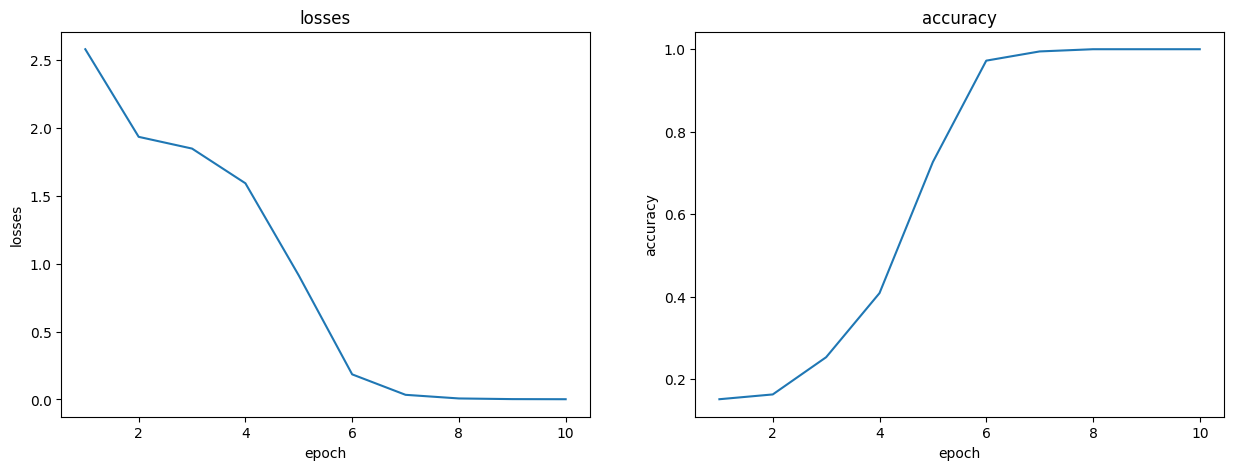

In [7]:
# Leng Lohanakakul 11/7/2022
# This code block displays the performance of the neural network trained over n_epochs
# Measures loss value and accuracy to evalute the performance of cnn 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), squeeze=False) 
# plot the loss value over n_epochs 
ax[0,0].plot(range(1,n_epochs+1), training.history['loss'])
ax[0,0].set_title("losses")
ax[0,0].set_xlabel('epoch') 
ax[0,0].set_ylabel('losses')
# plot the accuracy over n_epochs
ax[0,1].plot(range(1,n_epochs+1), training.history['accuracy'])
ax[0,1].set_title("accuracy")
ax[0,1].set_xlabel('epoch') 
ax[0,1].set_ylabel('accuracy')

plt.show() 

In [8]:
# Leng Lohanakakul 11/7/2022
# This code block evaluate the accuracy of the cnn on each testing dataset

# predict the model with testing dataset
predict = cnn.predict(x_thai_test)

score = cnn.evaluate(x_thai_train, y_thai_train) 
print(f"Train accuracy of the neural network = {score[1] * 100} %")

# evaluate the total accuracy of the cnn 
score = cnn.evaluate(x_thai_test, y_thai_test) 
print(f"Test accuracy of the neural network = {score[1] * 100} %")


9/9 [==============================] - 1s 166ms/step


2023-02-14 13:52:50.586079: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1209600000 exceeds 10% of free system memory.
2023-02-14 13:52:51.423830: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1209600000 exceeds 10% of free system memory.


35/35 [==============================] - 1s 31ms/step - loss: 0.0012 - accuracy: 1.0000
Train accuracy of the neural network = 100.0 %
9/9 [==============================] - 0s 32ms/step - loss: 3.1664 - accuracy: 0.2393
Test accuracy of the neural network = 23.92857074737549 %


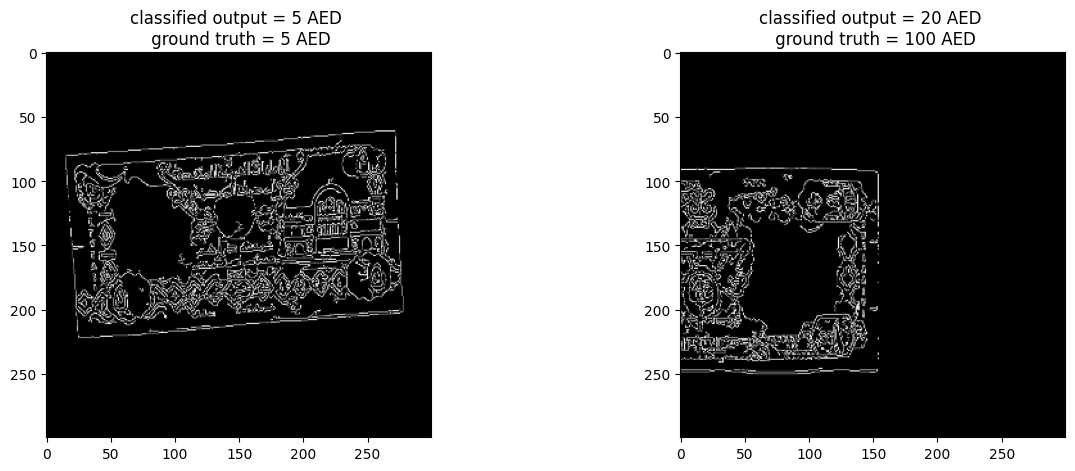

In [19]:
# Leng Lohanakakul 11/7/2022
# This code block display an example of correctly and incorrectly classified images 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), squeeze=False) 

# show an example of correcly classified image
for i in range(y_thai_test.shape[0]): 
  j = random.randint(0,199) 
  predicted = np.argmax(predict[j]) 
  if uae_label_conversion(predicted) == uae_label_conversion(y_thai_test[j]): 
    ax[0,0].imshow(np.squeeze(x_thai_test[j]), cmap="gray")
    ax[0,0].set_title(f"classified output = {uae_label_conversion(predicted)} \n ground truth = {uae_label_conversion(y_thai_test[j])}") 
    break

# show an example of misclassified image
for i in range(y_thai_test.shape[0]): 
  j = random.randint(0,199) 
  predicted = np.argmax(predict[j]) 
  if uae_label_conversion(predicted) != uae_label_conversion(y_thai_test[j]): 
    ax[0,1].imshow(np.squeeze(x_thai_test[j]), cmap="gray")
    ax[0,1].set_title(f"classified output = {uae_label_conversion(predicted)} \n ground truth = {uae_label_conversion(y_thai_test[j])}")
    plt.show() 
    break

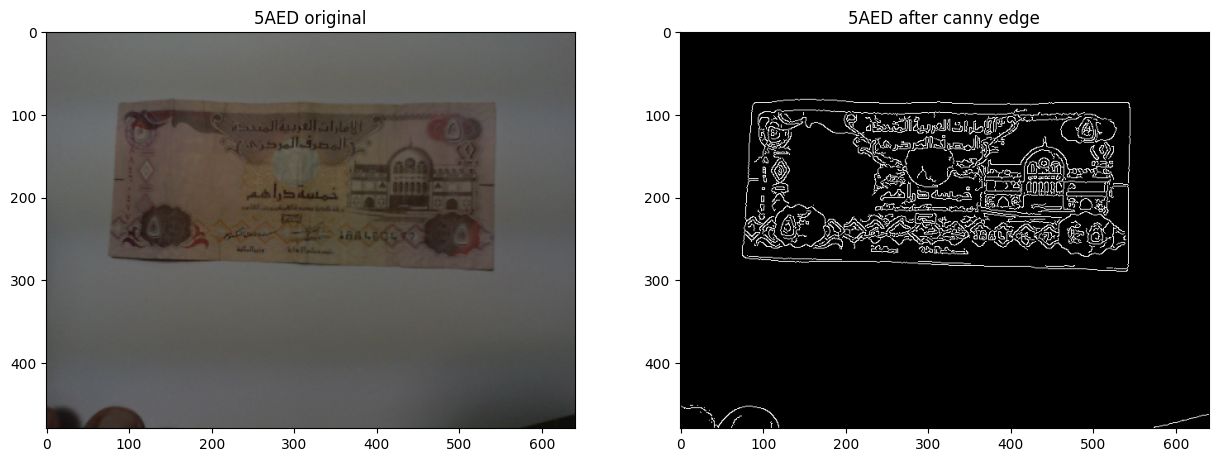

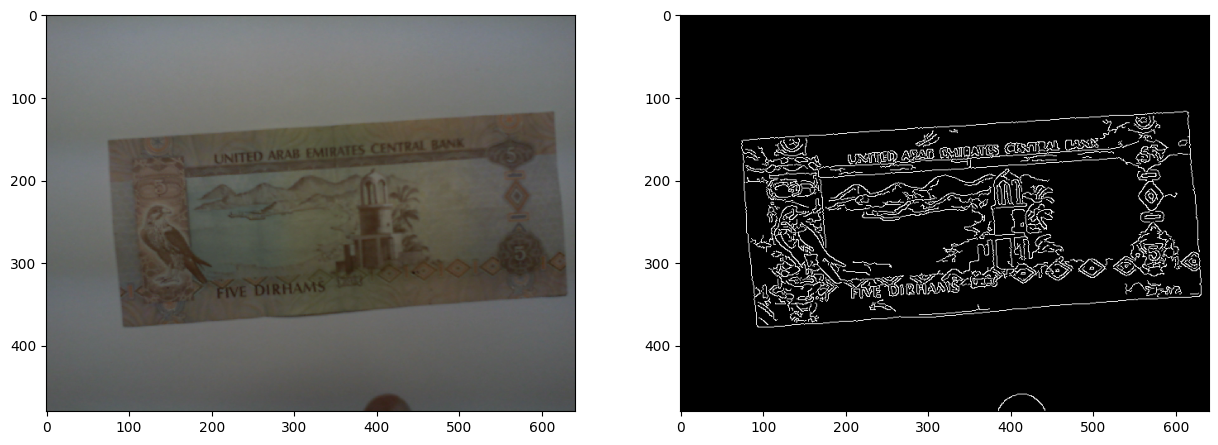

In [10]:
directory = '/data/plohanak/CurrencyDetection/Dataset/UAE Currencies'
image_class = 'AED5' 
no = '42'
image_name_front = image_class + '_front_' + no + '.png'
image_name_back = image_class + '_back_' + no + '.png'

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,10), squeeze=False) 

# image = Image.open(os.path.join(directory, image_class, image_name_front))
image = cv2.imread(os.path.join(directory, image_class, image_name_front))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax[0,0].imshow(image)
ax[0,0].set_title("5AED original")
image = cv2.GaussianBlur(image, (3,3), 0)
# image = cv2.Canny(image, 20, 100)
image = cv2.Canny(image, 10, 50)

ax[0,1].imshow(image, cmap='gray')
ax[0,1].set_title("5AED after canny edge")

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,10), squeeze=False) 
image_back = cv2.imread(os.path.join(directory, image_class, image_name_back))
image_back = cv2.cvtColor(image_back, cv2.COLOR_BGR2RGB)
ax[0,0].imshow(image_back)
image_back = cv2.GaussianBlur(image_back, (3,3), 0)
# image_back = cv2.Canny(image_back, 20, 50)
image_back = cv2.Canny(image_back, 10, 50)
ax[0,1].imshow(image_back, cmap='gray')

